In [1]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [6]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [7]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

606

In [9]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | besikduzu
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | altay
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | okakarara
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | homer
Processing Record 14 of Set 1 | ulladulla
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | sambava
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | chuy
Processing Record 23 of Set 1 | egvekinot
Processing Record 24 of Set 1 | ugoofaaru
Processing Record 25 of Set 1 | 

Processing Record 37 of Set 4 | ulaangom
Processing Record 38 of Set 4 | teguise
Processing Record 39 of Set 4 | ndele
Processing Record 40 of Set 4 | changchun
Processing Record 41 of Set 4 | zalari
Processing Record 42 of Set 4 | poum
Processing Record 43 of Set 4 | zhangye
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | suntar
Processing Record 46 of Set 4 | nevelsk
Processing Record 47 of Set 4 | osakarovka
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | palu
Processing Record 50 of Set 4 | mbaiki
Processing Record 1 of Set 5 | garissa
Processing Record 2 of Set 5 | yaan
Processing Record 3 of Set 5 | alekseyevka
Processing Record 4 of Set 5 | maryborough
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | segou
Processing Record 7 of Set 5 | gogrial
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | luanda
Processing Record 10 of Set 5 | eyl
Processing Record 11 of Set 5 | hire
City not found.

Processing Record 28 of Set 8 | havelock
Processing Record 29 of Set 8 | kulhudhuffushi
Processing Record 30 of Set 8 | yeppoon
Processing Record 31 of Set 8 | pelym
Processing Record 32 of Set 8 | gabi
Processing Record 33 of Set 8 | maracacume
Processing Record 34 of Set 8 | mazatlan
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | vilya
Processing Record 37 of Set 8 | khonuu
City not found. Skipping
Processing Record 38 of Set 8 | palana
Processing Record 39 of Set 8 | novopskov
Processing Record 40 of Set 8 | odweyne
Processing Record 41 of Set 8 | kaitangata
Processing Record 42 of Set 8 | mildura
Processing Record 43 of Set 8 | mugreyevskiy
City not found. Skipping
Processing Record 44 of Set 8 | tiarei
Processing Record 45 of Set 8 | tutoia
Processing Record 46 of Set 8 | goderich
Processing Record 47 of Set 8 | arkhara
Processing Record 48 of Set 8 | zapolyarnyy
Processing Record 49 of Set 8 | portobelo
Processing Record 50 of Set 8 | kisoro
Processing Re

Processing Record 21 of Set 12 | corumba
Processing Record 22 of Set 12 | kloulklubed
Processing Record 23 of Set 12 | puerto baquerizo moreno
Processing Record 24 of Set 12 | koutiala
Processing Record 25 of Set 12 | banff
Processing Record 26 of Set 12 | magadan
Processing Record 27 of Set 12 | preobrazhenka
Processing Record 28 of Set 12 | orsha
Processing Record 29 of Set 12 | houma
Processing Record 30 of Set 12 | solnechnyy
Processing Record 31 of Set 12 | mehamn
Processing Record 32 of Set 12 | bagdarin
Processing Record 33 of Set 12 | san policarpo
Processing Record 34 of Set 12 | attawapiskat
City not found. Skipping
Processing Record 35 of Set 12 | port blair
Processing Record 36 of Set 12 | mangan
Processing Record 37 of Set 12 | lebork
Processing Record 38 of Set 12 | nguiu
City not found. Skipping
Processing Record 39 of Set 12 | turukhansk
Processing Record 40 of Set 12 | ketchikan
Processing Record 41 of Set 12 | chatham
Processing Record 42 of Set 12 | benguela
Processi

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dunedin,NZ,2022-04-19 05:15:39,-45.8742,170.5036,61.50,64,93,2.10
1,Besikduzu,TR,2022-04-19 05:16:21,41.0520,39.2284,51.69,73,100,1.59
2,Mataura,NZ,2022-04-19 05:15:12,-46.1927,168.8643,59.49,83,100,2.24
3,Altay,CN,2022-04-19 05:16:22,47.8667,88.1167,59.59,32,99,11.39
4,Kavieng,PG,2022-04-19 05:16:22,-2.5744,150.7967,85.71,66,60,14.07
5,Bluff,NZ,2022-04-19 05:14:51,-46.6000,168.3333,59.81,88,100,3.74
6,Upernavik,GL,2022-04-19 05:14:58,72.7868,-56.1549,1.47,93,100,14.85
7,Okakarara,NA,2022-04-19 05:16:23,-20.5833,17.4333,57.88,62,11,5.79
8,Yellowknife,CA,2022-04-19 05:15:03,62.4560,-114.3525,3.16,99,81,4.29
9,Broken Hill,AU,2022-04-19 05:15:05,-31.9500,141.4333,58.17,60,55,22.26


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/18/22'

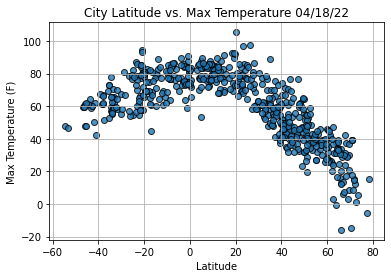

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

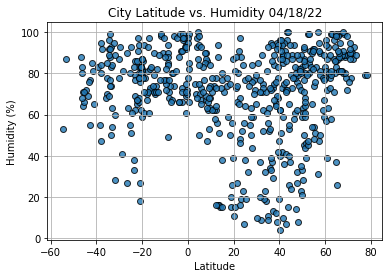

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()